In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimHei'  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


In [2]:
sample = pd.read_csv('trending_yt_videos_113_countries.csv')

In [3]:
#数据基本信息
sample.info()
sample.describe()
#数据缺失值与重复值统计
sample.isnull().sum()
sample.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532859 entries, 0 to 3532858
Data columns (total 18 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   title            object
 1   channel_name     object
 2   daily_rank       int64 
 3   daily_movement   int64 
 4   weekly_movement  int64 
 5   snapshot_date    object
 6   country          object
 7   view_count       int64 
 8   like_count       int64 
 9   comment_count    int64 
 10  description      object
 11  thumbnail_url    object
 12  video_id         object
 13  channel_id       object
 14  video_tags       object
 15  kind             object
 16  publish_date     object
 17  langauge         object
dtypes: int64(6), object(12)
memory usage: 485.2+ MB


title                    0
channel_name             0
daily_rank               0
daily_movement           0
weekly_movement          0
snapshot_date            0
country                  0
view_count               0
like_count               0
comment_count            0
description         681869
thumbnail_url            0
video_id                 0
channel_id               0
video_tags         1204764
kind                     0
publish_date             0
langauge            899955
dtype: int64

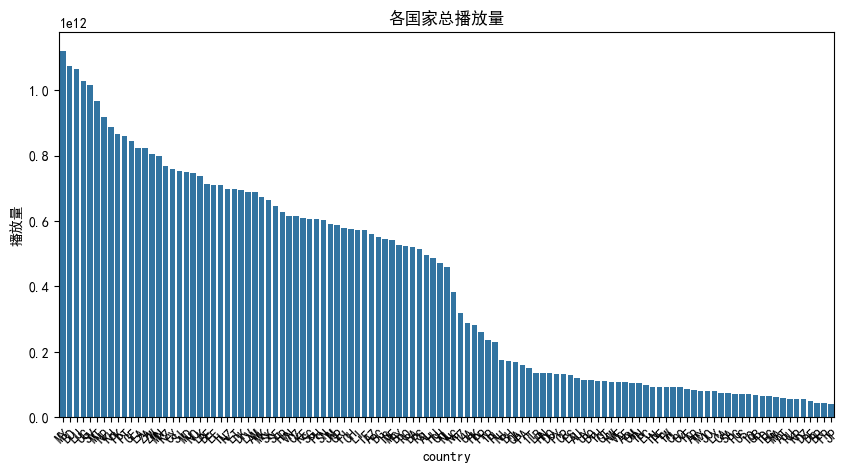

In [8]:
#不同国家浏览量对比
country_views = sample.groupby('country')['view_count'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=country_views.index, y=country_views.values)
plt.title('各国家总播放量')
plt.ylabel('播放量')
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': '每日播放量趋势'}, xlabel='snapshot_date'>

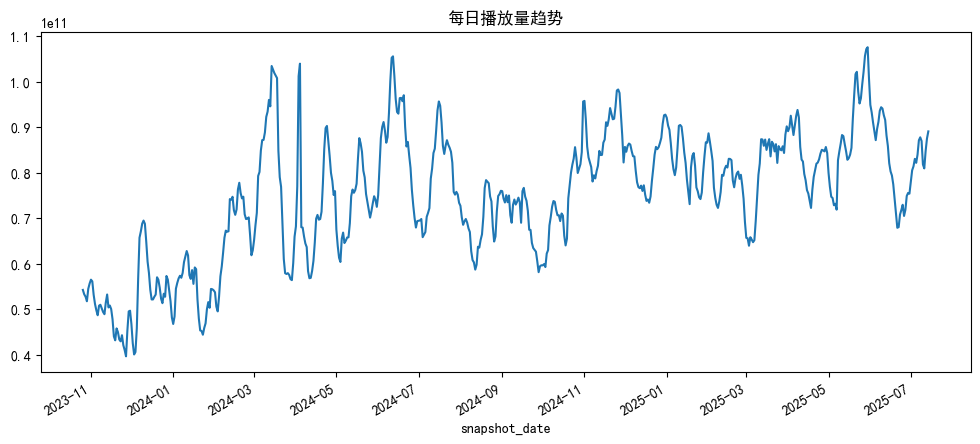

In [10]:
#热门视频播放趋势
sample['snapshot_date'] = pd.to_datetime(sample['snapshot_date'])
daily_views = sample.groupby('snapshot_date')['view_count'].sum()
daily_views.plot(figsize=(12,5), title='每日播放量趋势')


<Axes: title={'center': '播放量最高的频道Top10'}, ylabel='channel_name'>

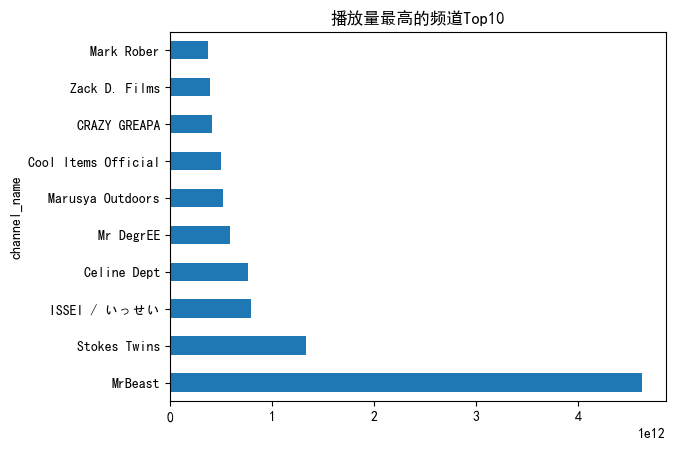

In [12]:
#频道浏览量排行Top10
top_channels = sample.groupby('channel_name')['view_count'].sum().sort_values(ascending=False).head(10)
top_channels.plot(kind='barh', title='播放量最高的频道Top10')